In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np 
import string 
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Not a great experience. I co...
1,Not Verified | I was excited to fly BA as I'd ...
2,Not Verified | I just want to warn everyone o...
3,Not Verified | Paid for business class travell...
4,✅ Trip Verified | The plane was extremely dir...


In [5]:
df.to_csv("BA_reviews.csv")

In [6]:
reviews = pd.read_csv("BA_reviews.csv")
reviews = reviews.pop("reviews")
reviews

0      ✅ Trip Verified | Not a great experience. I co...
1      Not Verified | I was excited to fly BA as I'd ...
2      Not Verified |  I just want to warn everyone o...
3      Not Verified | Paid for business class travell...
4      ✅ Trip Verified |  The plane was extremely dir...
                             ...                        
995    ✅ Trip Verified |  London to Seoul. I normally...
996    ✅ Trip Verified |  London Heathrow to New York...
997    ✅ Trip Verified | San Diego to London. From th...
998    ✅ Trip Verified |  Gatwick to St Lucia. Flew B...
999    ✅ Trip Verified |  London to Chennai. It was a...
Name: reviews, Length: 1000, dtype: object

# Clean data

In [7]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [8]:
reviews = reviews.str.replace('Trip Verified |','')
reviews = reviews.str.replace('Not Verified ','')
reviews = reviews.str.replace('✅','')
reviews = reviews.str.replace('|','')
reviews = reviews.str.replace("'",'')
reviews = reviews.str.replace(r'\b(\w{1,3})\b','')
reviews = reviews.apply(remove_punctuation)
reviews


C:\Users\DELL\AppData\Local\Temp\ipykernel_9100\2734484534.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews = reviews.str.replace('Trip Verified |','')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9100\2734484534.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  reviews = reviews.str.replace('|','')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9100\2734484534.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews = reviews.str.replace(r'\b(\w{1,3})\b','')


0          great experience  could  check  online   s...
1         excited       travelled with them long haul...
2         just want  warn everyone   worst customer s...
3       Paid  business class travelling Cairo  London...
4          plane  extremely dirty with chocolate smud...
                             ...                        
995       London  Seoul  normally  business  this   l...
996       London Heathrow   York   drop    well Loung...
997       Diego  London From  moment that  boarded th...
998       Gatwick   Lucia Flew   revamped business cl...
999       London  Chennai   amazing  crew were very f...
Name: reviews, Length: 1000, dtype: object

In [9]:
# Function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation

    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

# Apply text preprocessing to the 'reviews' column
reviews = reviews.apply(preprocess_text)

In [10]:
reviews

0      great experience could check online separate p...
1      excited travelled with them long haul over 25y...
2      just want warn everyone worst customer service...
3      paid business class travelling cairo london he...
4      plane extremely dirty with chocolate smudged o...
                             ...                        
995    london seoul normally business this last minut...
996    london heathrow york drop well lounge gallery ...
997    diego london from moment that boarded this fli...
998    gatwick lucia flew revamped business class tod...
999    london chennai amazing crew were very friendly...
Name: reviews, Length: 1000, dtype: object

In [14]:
df1 = pd.DataFrame(reviews)

In [15]:
df1

,reviews
0,great experience could check online separate p...
1,excited travelled with them long haul over 25y...
2,just want warn everyone worst customer service...
3,paid business class travelling cairo london he...
4,plane extremely dirty with chocolate smudged o...
...,...
995,london seoul normally business this last minut...
996,london heathrow york drop well lounge gallery ...
997,diego london from moment that boarded this fli...
998,gatwick lucia flew revamped business class tod...


In [17]:
freq_words = pd.Series(''.join(reviews).lower().split()).value_counts()[:50]
freq_words

flight       2094
with         1347
that         1191
they         1135
were         1057
this          865
seat          845
have          820
service       742
from          718
time          616
hour          579
very          576
there         456
food          446
crew          439
class         431
airline       428
london        427
which         423
good          416
when          408
airway        402
british       400
staff         393
business      389
their         383
cabin         370
would         368
after         364
customer      338
only          336
check         336
’             319
been          318
heathrow      316
them          304
passenger     294
back          294
then          288
just          278
even          267
airport       262
told          262
could         258
other         255
more          252
boarding      248
plane         246
economy       245
dtype: int64

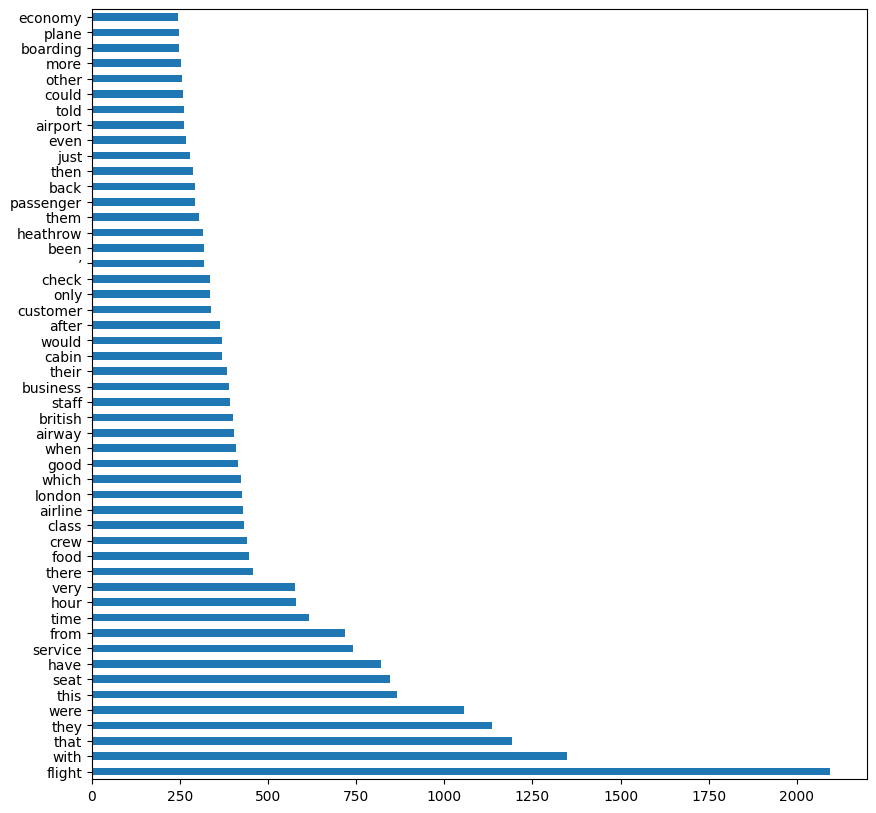

In [12]:
plt.figure(figsize = (10,10))
freq_words.plot.barh(x= freq_words[0], y= freq_words[1])
plt.show()

In [19]:
from textblob import TextBlob

In [20]:
# Function to get sentiment polarity
def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the sentiment analysis function to each review in the 'reviews' column
df1['sentiment_polarity'] = df1['reviews'].apply(get_sentiment_polarity)

# Categorize sentiments as positive, negative, or neutral based on the polarity
df1['sentiment'] = df1['sentiment_polarity'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

# Display the DataFrame with the new 'sentiment' column
print(df1[['reviews', 'sentiment']])

                                               reviews sentiment
0    great experience could check online separate p...  positive
1    excited travelled with them long haul over 25y...  positive
2    just want warn everyone worst customer service...  positive
3    paid business class travelling cairo london he...  negative
4    plane extremely dirty with chocolate smudged o...  negative
..                                                 ...       ...
995  london seoul normally business this last minut...  positive
996  london heathrow york drop well lounge gallery ...  positive
997  diego london from moment that boarded this fli...  negative
998  gatwick lucia flew revamped business class tod...  positive
999  london chennai amazing crew were very friendly...  positive

[1000 rows x 2 columns]


In [21]:
df1

,reviews,sentiment_polarity,sentiment
0,great experience could check online separate p...,0.163790,positive
1,excited travelled with them long haul over 25y...,0.059028,positive
2,just want warn everyone worst customer service...,0.076852,positive
3,paid business class travelling cairo london he...,-0.466667,negative
4,plane extremely dirty with chocolate smudged o...,-0.121581,negative
...,...,...,...
995,london seoul normally business this last minut...,0.103571,positive
996,london heathrow york drop well lounge gallery ...,0.314103,positive
997,diego london from moment that boarded this fli...,-0.032949,negative
998,gatwick lucia flew revamped business class tod...,0.245370,positive


In [22]:
# Save data into your folder
df1.to_csv('C:/Data Science/airways/airway_review_data1.csv', index=False)

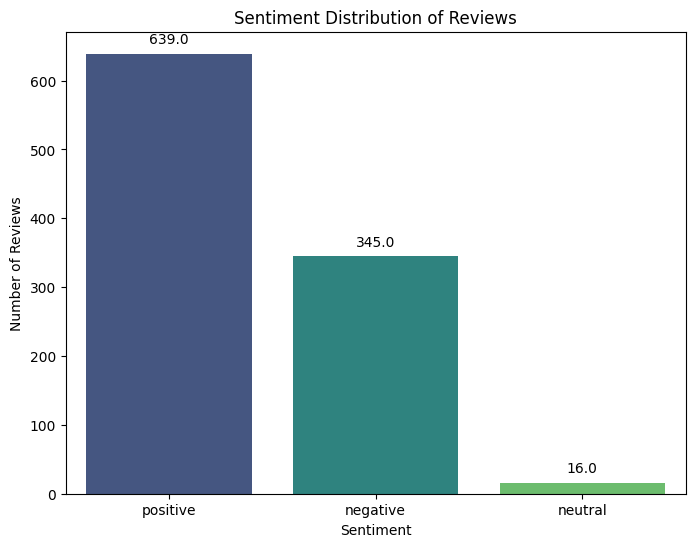

In [23]:
# Categorize sentiments as positive, negative, or neutral based on the polarity
df1['Sentiment'] = df1['sentiment_polarity'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

# Count the number of positive, negative, and neutral reviews
sentiment_counts = df1['Sentiment'].value_counts()

# Plot the bar chart with annotations
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

# Add annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
# Plot the bar chart

plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()